Strategy: Find closely correlated stocks among the top 50 market cap companies and separate into a variable number of groups using clustering. Implement a moving average strategy. 

Generate buy and sell indicators using LSTM model. If a threshold number of companies in a group have a certain indicator, follow that indicator for all companies in the group. 

In [1]:
# IMPORTS
import math
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
from matplotlib import pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LinearRegression

In [2]:
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'BRK-A', 'UNH', 'XOM', 
         'JNJ', 'V', 'WMT', 'JPM', 'CVX', 'LLY', 'NVDA', 'TSM',
         'PG', 'MA', 'HD', 'BAC', 'PFE', 'ABBV', 'KO', 'MRK', 'PEP',
          'META', 'COST', 'ORCL', 'TMO', 'MCD', 'AVGO', 'DIS', 'TM',
          'NVO', 'ACN', 'ASML', 'TMUS', 'CSCO', 'DHR', 'AZN', 'NVS', 'WFC',
          'ABT', 'BABA', 'BMY', 'CRM', 'COP', 'VZ', 'NEE', 'SCHW']

print(len(stocks))

50


In [3]:
df = yf.download(stocks, start="2015-01-01", end="2022-11-01")
df

[*********************100%***********************]  50 of 50 completed


Adj Close                                                 \
                  AAPL        ABBV        ABT         ACN        AMZN   
Date                                                                    
2015-01-02   24.644020   46.979843  38.606464   77.739189   15.426000   
2015-01-05   23.949759   46.095703  38.615063   76.426636   15.109500   
2015-01-06   23.952011   45.867554  38.176544   75.875359   14.764500   
2015-01-07   24.287870   47.721371  38.486088   77.467949   14.921000   
2015-01-08   25.221062   48.220467  39.277138   78.649254   15.023000   
...                ...         ...        ...         ...         ...   
2022-10-25  152.339996  149.820007  97.949997  280.609985  120.599998   
2022-10-26  149.350006  152.509995  98.419998  279.869995  115.660004   
2022-10-27  144.800003  153.500000  96.930000  278.839996  110.959999   
2022-10-28  155.740005  147.610001  99.489998  287.779999  103.410004   
2022-10-31  153.339996  146.399994  98.940002  283.899994  102.440002   

                                                                      ...  \
                  ASML        AVGO        AZN        BABA        BAC  ...   
Date                                                                  ...   
2015-01-02   99.323936   79.733498  26.467318  103.599998  15.456276  ...   
2015-01-05   95.985413   78.458931  26.264301  101.000000  15.007271  ...   
2015-01-06   93.146240   76.674500  25.625175  103.320000  14.558254  ...   
2015-01-07   93.673386   78.745689  25.598860  102.129997  14.627331  ...   
2015-01-08   95.633972   82.681000  25.967297  105.029999  14.929554  ...   
...                ...         ...        ...         ...        ...  ...   
2022-10-25  486.010010  460.070007  55.900002   63.220001  35.389999  ...   
2022-10-26  484.089996  461.179993  57.959999   68.510002  35.700001  ...   
2022-10-27  474.410004  455.399994  57.610001   65.839996  35.869999  ...   
2022-10-28  489.179993  472.899994  58.709999   63.740002  36.180000  ...   
2022-10-31  472.420013  470.119995  58.810001   63.580002  36.040001  ...   

             Volume                                                   \
                TMO      TMUS      TSLA       TSM      UNH         V   
Date                                                                   
2015-01-02  2034700   3515300  71466000   6074100  3060900   8389600   
2015-01-05  2430300   3477300  80527500   9031800  4679000  12751200   
2015-01-06  2519300   4237100  93928500  10169500  3468300  11070000   
2015-01-07  2098300   7528300  44526000  10180200  3225800   9346800   
2015-01-08  2515800   6715900  51637500  15825900  5346100  10443200   
...             ...       ...       ...       ...      ...       ...   
2022-10-25  2382800   5738500  96507900  21700600  2411900  11907200   
2022-10-26  2446900   6662300  85012500  14006000  2863500  15450000   
2022-10-27  2334800   7425300  61638800  12937600  2212100   7946700   
2022-10-28  2017100  13901200  69039900  11965500  2758700   8454200   
2022-10-31  2875200   8395300  61485800  10801100  2770400   8672400   

                                                    
                  VZ       WFC       WMT       XOM  
Date                                                
2015-01-02  11421200  11700900   4501800  10220400  
2015-01-05  18964500  15000500   6979000  18502400  
2015-01-06  22950100  20211200   8205100  16670700  
2015-01-07  20793600  15714700   8498400  13590700  
2015-01-08  17617500  16721600  12713600  15487500  
...              ...       ...       ...       ...  
2022-10-25  25496500  16362200   5017100  15719800  
2022-10-26  20328200  15010800   6918100  17383800  
2022-10-27  20268000  14655500   5534300  18214000  
2022-10-28  31821500  14989200   4548900  28158200  
2022-10-31  26626900  13998200   7523700  26392300  

[1972 rows x 300 columns]

In [4]:
X = df['Adj Close']

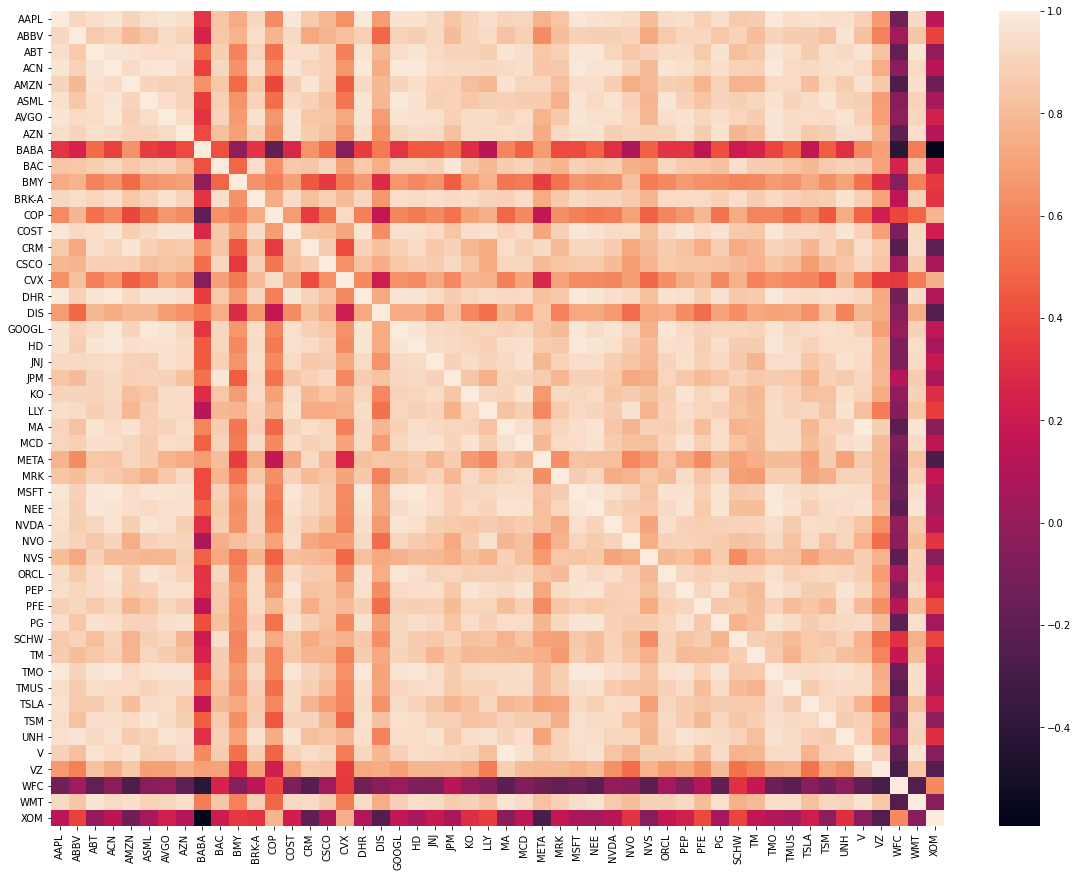

In [5]:
corr = X.corr() # Get the correlation matrix
plt.figure(figsize = (20, 15))
sns.heatmap(corr) # Although it is called heatmap here, it nonetheless shows the pairwise correlation between features.
plt.show()

In [6]:
sort = corr['AAPL'].sort_values(ascending = False)
sort

AAPL     1.000000
TMO      0.985326
DHR      0.982348
MSFT     0.980021
COST     0.975337
AVGO     0.971483
ACN      0.969703
GOOGL    0.961322
NEE      0.960219
TSLA     0.960216
HD       0.958642
UNH      0.955019
ASML     0.953868
NVDA     0.952319
TSM      0.949785
AZN      0.949643
ABT      0.949551
PG       0.949072
PEP      0.947873
LLY      0.944331
TMUS     0.943615
ORCL     0.936158
NVO      0.932887
WMT      0.921718
JNJ      0.919996
ABBV     0.917707
BRK-A    0.917512
MCD      0.906669
KO       0.905527
MA       0.901963
AMZN     0.900621
V        0.889551
PFE      0.882086
TM       0.871564
CRM      0.861609
SCHW     0.861587
BAC      0.844240
JPM      0.840793
MRK      0.836666
NVS      0.809602
CSCO     0.782232
META     0.766497
BMY      0.733635
DIS      0.679493
VZ       0.672801
CVX      0.638135
COP      0.617091
BABA     0.323660
XOM      0.144643
WFC     -0.132706
Name: AAPL, dtype: float64

In [7]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial import distance

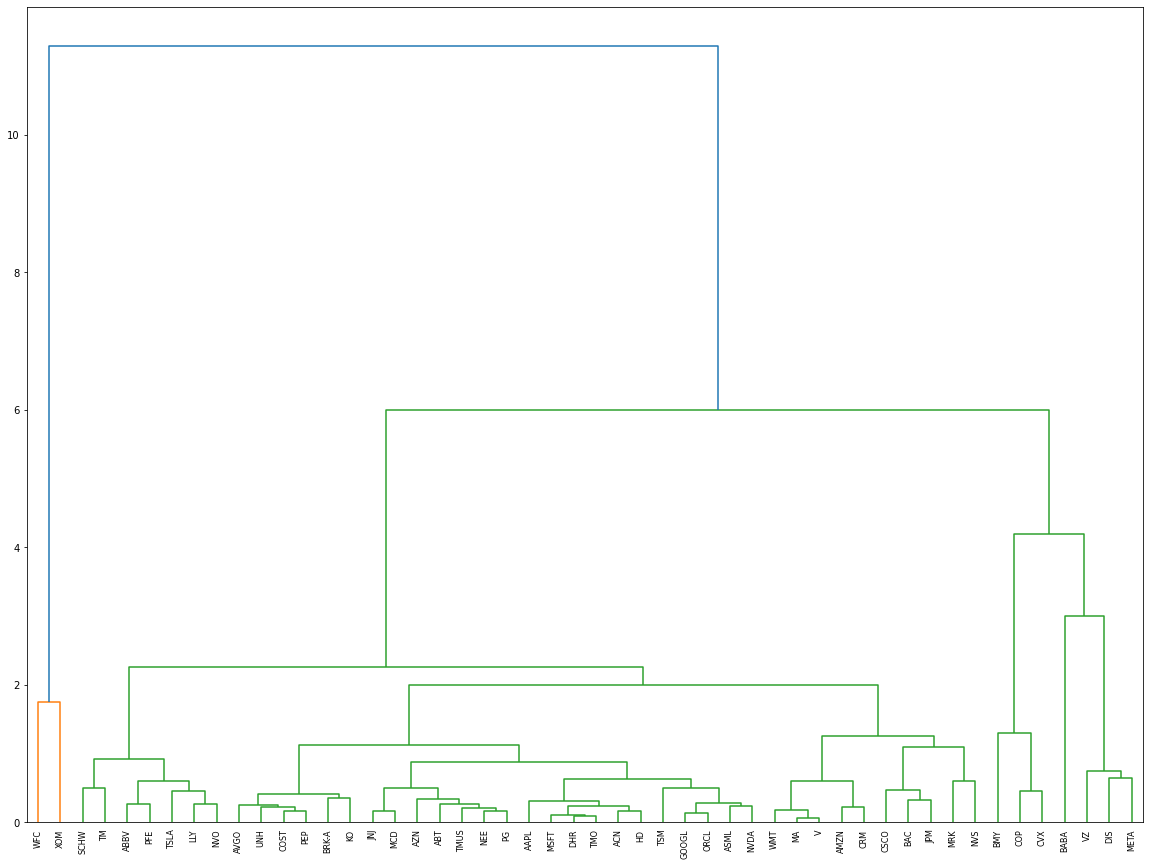

In [10]:
corr_values = np.asarray(corr.values)

plt.figure(figsize = (20, 15))
dist = linkage(distance.pdist(corr_values), method = 'ward')

dn = dendrogram(dist, labels=X.columns)
plt.show()
threshold = 4

labels = fcluster(dist, threshold, criterion='distance')

In [11]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 2, 2, 2, 3, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 1, 2, 1], dtype=int32)

In [ ]:
sep = []              